In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_music = pd.read_csv('musicData.csv')
df_music.head()

,timestamp,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,song1,...,total_health,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,health_categorical
0,05/11/2016 14:34:00,Male,18 - 30,1 - 2,4,3,5,3,6,Too Good Drake,...,21,0.6330,0.655000,0.1100,0.5715,98.3680,0.000025,0.281600,71.500000,1.0
1,05/11/2016 14:45:26,Male,18 - 30,1 - 2,6,6,3,5,5,Put that on my set asap rocky ft skepta,...,25,0.6550,0.526000,0.1160,0.1560,121.1270,0.000000,0.056600,65.000000,1.0
2,05/11/2016 14:45:41,Female,18 - 30,0 - 1,5,5,4,4,5,Fireproof Coleman Hell,...,23,0.7455,0.742000,0.1835,0.6185,125.0090,0.000023,0.053800,63.500000,1.0
3,05/11/2016 14:45:55,Male,18 - 30,2+,3,6,5,5,5,Eyes Nose Lips TaeYang,...,24,0.7390,0.681667,0.1489,0.5960,113.5760,0.000001,0.348867,60.333333,1.0
4,05/11/2016 14:49:15,Female,18 - 30,0 - 1,2,5,2,1,5,Sugar Wanderlust,...,15,0.5390,0.513000,0.2155,0.2915,122.4605,0.464350,0.599500,3.000000,0.0


In [5]:
#null values
pd.isnull(df_music).sum()

timestamp             0
gender                0
age                   0
amount_music          0
life_enjoyment        0
resilience            0
balanced_life         0
emotional_flex        0
self_actualization    0
song1                 0
song2                 0
song3                 0
trauma                0
id                    0
total_health          0
energy                5
dance                 5
liveness              5
valence               5
tempo                 5
instrumental          5
acoustic              5
popularity            5
health_categorical    0
dtype: int64

In [6]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           235 non-null    object 
 1   gender              235 non-null    object 
 2   age                 235 non-null    object 
 3   amount_music        235 non-null    object 
 4   life_enjoyment      235 non-null    int64  
 5   resilience          235 non-null    int64  
 6   balanced_life       235 non-null    int64  
 7   emotional_flex      235 non-null    int64  
 8   self_actualization  235 non-null    int64  
 9   song1               235 non-null    object 
 10  song2               235 non-null    object 
 11  song3               235 non-null    object 
 12  trauma              235 non-null    object 
 13  id                  235 non-null    int64  
 14  total_health        235 non-null    int64  
 15  energy              230 non-null    float64
 16  dance   

<h2>Top ten less popular songs</h2>


In [7]:
sorted_df = df_music.sort_values('popularity', ascending= True ).head(10)

In [8]:
sorted_df

,timestamp,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,song1,...,total_health,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,health_categorical
4,05/11/2016 14:49:15,Female,18 - 30,0 - 1,2,5,2,1,5,Sugar Wanderlust,...,15,0.539000,0.513000,0.215500,0.291500,122.460500,0.464350,0.599500,3.000000,0.0
133,05/11/2016 20:07:16,Male,18 - 30,1 - 2,4,1,2,4,5,Deadmau5 Arguru (EDXs 5un5hine Remix),...,16,0.743000,0.731333,0.111800,0.505000,135.990000,0.558930,0.011197,18.666667,1.0
231,08/11/2016 12:02:50,Male,18 - 30,1 - 2,2,3,4,3,3,Light up the sky the Afters,...,15,0.635500,0.520500,0.210300,0.498500,115.990000,0.016350,0.015955,27.000000,0.0
29,05/11/2016 15:21:22,Male,18 - 30,1 - 2,5,3,1,4,4,Cold Water By Major Lazer justin bieber,...,17,0.383667,0.526667,0.151333,0.355000,117.888333,0.620000,0.691667,29.000000,1.0
164,06/11/2016 00:22:22,Female,18 - 30,1 - 2,3,5,4,2,5,Starboy The Weeknd,...,19,0.597333,0.757333,0.116200,0.563000,152.987333,0.525335,0.207667,30.000000,1.0
108,05/11/2016 18:34:46,Female,18 - 30,2+,4,2,2,2,3,Faster Amaranthe,...,13,0.917667,0.496000,0.368667,0.272667,146.667333,0.137110,0.000438,30.333333,0.0
92,05/11/2016 17:25:49,Male,30+,1 - 2,2,5,3,6,5,Five more hours Derro,...,21,0.686000,0.681000,0.173850,0.198000,124.487500,0.009935,0.200500,31.000000,1.0
163,06/11/2016 00:07:57,Male,18 - 30,2+,1,4,3,5,5,Fake Love Drake,...,18,0.605000,0.733000,0.170333,0.565667,139.987333,0.330200,0.067733,31.666667,1.0
51,05/11/2016 15:54:40,Female,18 - 30,5,5,6,4,5,5,Arirang Song So Hee,...,25,0.506333,0.381000,0.176667,0.524767,106.713667,0.557002,0.585533,33.000000,1.0
91,05/11/2016 17:17:12,Male,18 - 30,0 - 1,3,2,1,5,3,Blue Jay season Tory lanez,...,14,0.677000,0.365000,0.403000,0.261000,147.906000,0.003300,0.011100,34.000000,0.0


<h2>Descriptive statistics</h2>

In [10]:
df_music.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
life_enjoyment,235.0,3.434043,1.413802,0.000000,3.000000,3.000000,4.000000,6.000000
resilience,235.0,4.017021,1.310594,0.000000,3.000000,4.000000,5.000000,6.000000
balanced_life,235.0,3.629787,1.406322,0.000000,2.500000,4.000000,5.000000,6.000000
emotional_flex,235.0,3.651064,1.529465,0.000000,3.000000,4.000000,5.000000,6.000000
self_actualization,235.0,4.306383,1.355490,0.000000,4.000000,5.000000,5.000000,6.000000
id,235.0,117.000000,67.982841,0.000000,58.500000,117.000000,175.500000,234.000000
total_health,235.0,19.038298,4.715249,6.000000,16.000000,20.000000,22.000000,30.000000
energy,230.0,0.632621,0.140835,0.143000,0.544250,0.640667,0.712167,0.967667
dance,230.0,0.624728,0.120391,0.175000,0.547500,0.637167,0.709500,0.896000
liveness,230.0,0.187970,0.095937,0.068300,0.119208,0.164333,0.221000,0.799000


<h2>Ten most popular songs</h2>

In [12]:
most_popular=df_music.query('popularity>60', inplace=False).sort_values('popularity', ascending = False)
most_popular[:10]

,timestamp,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,song1,...,total_health,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,health_categorical
175,06/11/2016 10:02:15,Female,18 - 30,2+,3,3,2,2,4,21K Bruno Mars,...,14,0.4450,0.781000,0.184000,0.591000,78.998000,0.000000,0.474000,86.000000,0.0
196,06/11/2016 16:04:47,Female,18 - 30,0 - 1,1,3,2,2,2,Side to side ariana grande,...,10,0.7360,0.650000,0.235000,0.612000,159.174000,0.000000,0.051300,84.000000,0.0
6,05/11/2016 14:51:28,Male,18 - 30,1 - 2,4,5,2,5,4,Timmy Turner Desiigner,...,20,0.6410,0.692000,0.188867,0.393667,137.599333,0.000955,0.107807,82.000000,1.0
110,05/11/2016 18:44:01,Female,18 - 30,0 - 1,4,5,6,4,4,You're going to miss me when I'm gone Anna Ken...,...,23,0.4730,0.765000,0.391000,0.340000,119.992000,0.000000,0.287000,82.000000,1.0
188,06/11/2016 14:18:57,Female,18 - 30,2+,3,4,4,3,4,Starry The Weeknd,...,18,0.5695,0.611000,0.202500,0.455500,89.999000,0.000022,0.169550,81.500000,1.0
161,06/11/2016 00:04:00,Female,18 - 30,0 - 1,3,4,1,4,4,Closer Chainsmokers,...,16,0.6020,0.700000,0.107733,0.450000,127.669333,0.000005,0.289333,81.333333,1.0
44,05/11/2016 15:48:57,Female,18 - 30,1 - 2,0,2,2,0,5,Closer Chainsmokers,...,9,0.6180,0.679000,0.111000,0.450667,97.902000,0.000000,0.173500,81.333333,0.0
204,06/11/2016 18:58:03,Female,18 - 30,2+,3,5,2,5,4,Stay High cover Theory of a Deadman,...,19,0.8430,0.708000,0.799000,0.625000,148.140000,0.000000,0.397000,81.000000,1.0
33,05/11/2016 15:34:23,Male,18 - 30,1 - 2,5,6,5,5,6,Closer The Chainsmokers,...,27,0.5670,0.765500,0.104650,0.539500,97.528500,0.000000,0.378500,81.000000,1.0
118,05/11/2016 19:13:51,Male,18 - 30,0 - 1,6,4,4,4,2,My Way Calvin Harris,...,20,0.6920,0.709667,0.134000,0.403333,132.010333,0.000015,0.085667,81.000000,1.0


In [ ]:
#check the artist by merging with the csv containing artists names

<h2>Correlation Map</h2>

[Text(0.5, 0, 'life_enjoyment'),
 Text(1.5, 0, 'resilience'),
 Text(2.5, 0, 'balanced_life'),
 Text(3.5, 0, 'emotional_flex'),
 Text(4.5, 0, 'self_actualization'),
 Text(5.5, 0, 'id'),
 Text(6.5, 0, 'total_health'),
 Text(7.5, 0, 'energy'),
 Text(8.5, 0, 'dance'),
 Text(9.5, 0, 'liveness'),
 Text(10.5, 0, 'valence'),
 Text(11.5, 0, 'tempo'),
 Text(12.5, 0, 'instrumental'),
 Text(13.5, 0, 'acoustic'),
 Text(14.5, 0, 'popularity'),
 Text(15.5, 0, 'health_categorical')]

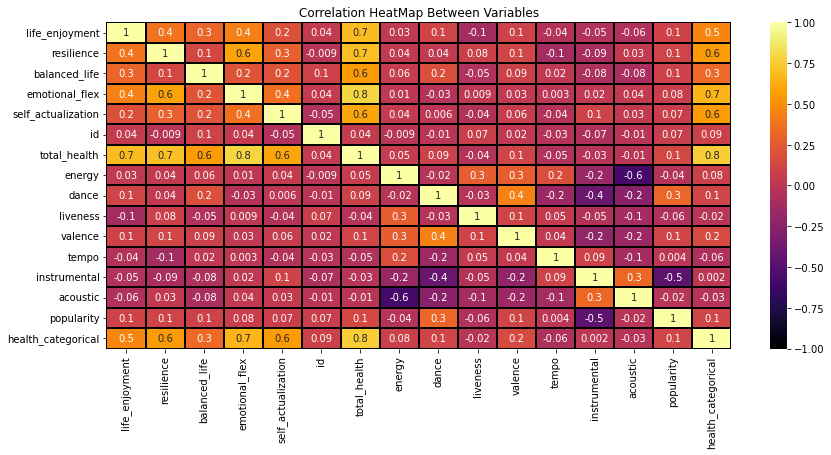

In [16]:
corr_df = df_music.corr(method='pearson')
plt.figure(figsize = (14,6))
heatmap=sns.heatmap(corr_df, annot=True, fmt ='.1g', vmin =-1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
heatmap.set_title('Correlation HeatMap Between Variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

#why are we missing gender and age??

[Text(0.5, 1.0, 'Balanced_life vs Dance Correlation')]

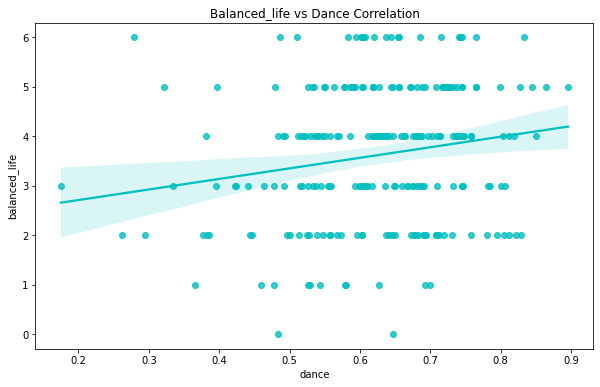

In [24]:
plt.figure(figsize=(10,6))
sns.regplot(data = df_music, y = 'balanced_life', x = 'dance', color='c').set(title = 'Balanced_life vs Dance Correlation')